Game Plan:
In this problem we are give the signal of a wave with observations taken at regualar intervals. Because it is measured regularly we can use a forrier transformation on it to determine the nature of the dominate waves within it. 

Imports nessacary packages 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

Converts the data from a CSV into a dataframe

In [2]:
data=pd.read_csv('Prob1.csv')
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Prob1.csv'

We make a forrier transformation to find the frequencies of the waves within the signal. By looking at the graph there is likely 4 seperate waves within the signal. We only know the frequency of the waves and don't know the amplitude yet. We will get it later we can find the amplitudes with a bit of math

Text(0.5, 1.0, 'Power spectrum of signal')

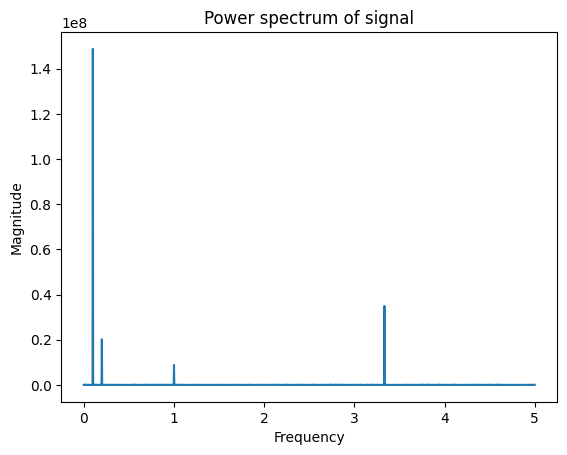

In [ ]:
y =abs(np.fft.rfft(data['signal']))**2
x =np.fft.rfftfreq(len(data['time']),0.1)
plt.plot(x,y)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Power spectrum of signal')

In this next code chunk we are just plucking out the dominate frequencies and converting them from frequency to period. We find that the four signals have a period of 10, 0.3, 5, and 1 seconds

In [ ]:
max_power_idx = np.argmax(y)
dominant_frequency1=x[max_power_idx]
period1=1/dominant_frequency1
y[max_power_idx]=0

max_power_idx2 = np.argmax(y)
dominant_frequency2=x[max_power_idx2]
period2=1/dominant_frequency2
y[max_power_idx2]=0

max_power_idx3 = np.argmax(y)
dominant_frequency3=x[max_power_idx3]
period3=1/dominant_frequency3
y[max_power_idx3]=0

max_power_idx4 = np.argmax(y)
dominant_frequency4=x[max_power_idx4]
period4=1/dominant_frequency4
y[max_power_idx4]=0

print(period1,period2,period3,period4)

10.0 0.3 5.0 1.0


Now we are going to use the formula $A = \frac{1}{N}
\left| \mathcal{F}(f) \right| \times 2$ to find the amplitudes of these waves. The times two in the equation is because of the symetric nature of the graph. I am not quite sure but I think that the $\frac{1}{N}$ so that the height of the forrier transform needs to be higher with more observations. This is because each indivigual peice of data contributes to the height of the spikes. 
~I am really iffy on the why of this math~

In [ ]:
temp_fft = abs(np.fft.rfft(data['signal']))
amplitude1 = (1/len(data['time']) * 2 * temp_fft[max_power_idx])
amplitude2 = (1/len(data['time']) * 2 * temp_fft[max_power_idx2])
amplitude3 = (1/len(data['time']) * 2 * temp_fft[max_power_idx3])
amplitude4 = (1/len(data['time']) * 2 * temp_fft[max_power_idx4])

Now we calculate out the phase of these waves using the equation $\phi =
\arctan\left(\frac{\operatorname{Im}(\mathcal{F}(f))}{\operatorname{Re}(\mathcal{F}(f))}\right)$. This finds the angle of a line within the complex plane, which is the phase.

In [ ]:
dom_fft = np.fft.rfft(data['signal'])
vals1 = dom_fft[max_power_idx]
vals2 = dom_fft[max_power_idx2]
vals3 = dom_fft[max_power_idx3]
vals4 = dom_fft[max_power_idx4]

dominant_phase1 = np.arctan2(np.imag(vals1),np.real(vals1))
dominant_phase2 = np.arctan2(np.imag(vals2),np.real(vals2))
dominant_phase3 = np.arctan2(np.imag(vals3),np.real(vals3))
dominant_phase4 = np.arctan2(np.imag(vals4),np.real(vals4))

This next chunk generates the data points of the waves that we found. In the future we will use this to graph out the sin waves

In [ ]:
def coswave(t, A, period, phase):
    return A*np.cos((2*np.pi/period*t)+phase)
small_data=data[data['time']<=10]
wave_time=np.linspace(0,10,1000)
new_y1=coswave(wave_time,amplitude1,period1,dominant_phase1)
new_y2=coswave(wave_time,amplitude2,period2,dominant_phase2)
new_y3=coswave(wave_time,amplitude3,period3,dominant_phase3)
new_y4=coswave(wave_time,amplitude4,period4,dominant_phase4)

Now we graph out the present waves on the data over the length of the period of the largest wave to see how the waves compare to our signal

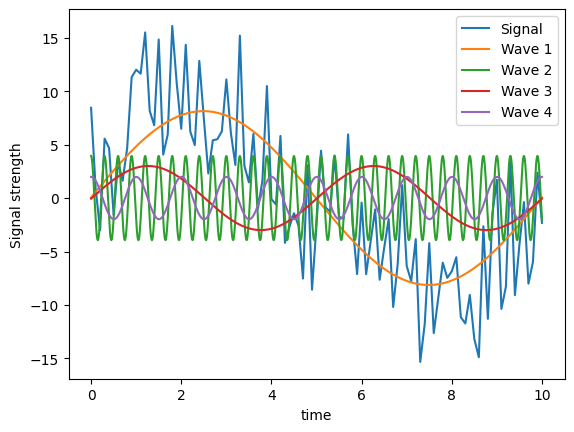

In [ ]:
plt.plot(small_data['time'],small_data['signal'],label='Signal')
plt.plot(wave_time,new_y1,label='Wave 1')
plt.plot(wave_time,new_y2,label='Wave 2')
plt.plot(wave_time,new_y3,label='Wave 3')
plt.plot(wave_time,new_y4,label='Wave 4')
plt.xlabel('time')
plt.ylabel('Signal strength')
plt.legend()

This isn't required but I think it is incredibly satisfying to see. Below is all of the waves combined overlayed on top of the signal data. It actually predicts the data incredibly well

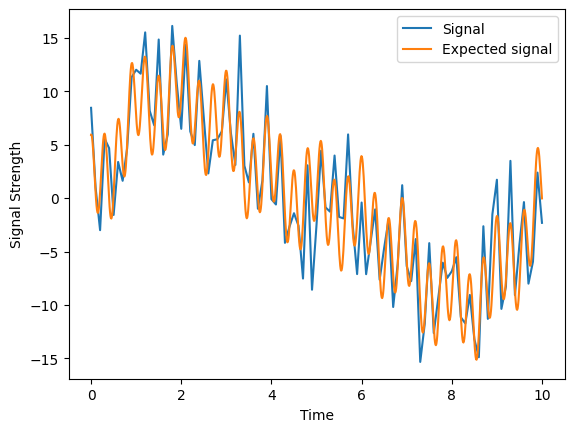

In [ ]:
overlayed_wave=new_y1+new_y2+new_y3+new_y4
plt.plot(small_data['time'],small_data['signal'],label='Signal')
plt.plot(wave_time,overlayed_wave,label='Expected signal')
plt.xlabel('Time')
plt.ylabel('Signal Strength')
plt.legend()